In [3]:
path = '/Volumes/Seagate/ML/Machine-Learning-Implementations/ML'
import sys
sys.path.insert(1, path)
path = '/Volumes/Seagate/ML/Machine-Learning-Implementations'
import sys
sys.path.insert(1, path)

import numpy as np 
import pandas as pd

import ML
from sklearn import linear_model
import numpy as np
import pandas as pd

from tqdm import tqdm_notebook
from ML import gradientDescent as gd

import matplotlib.pyplot as plt


import ML.kernels as kl

In [5]:
X = np.random.normal(0,10,(150,2))
Y = np.sum(X,1)
Z = np.array(Y > 0,int)
W = np.array(Y<0,int)
Y = Z - W


N,p = X.shape
split = int(0.8*N)
X_train, X_val = X[:split], X[split:]
y_train, y_val = Y[:split], Y[split:]




kernel = kl.SquareExponential(0.9,0.8)
svm = ML.SVM(kernel = kernel, C = 1)
svm.fit(X_train,y_train)
training_acc = sum(svm.predict(X_train) == y_train.reshape(-1,1))/len(y_train)

print(training_acc)


validation_acc = sum(svm.predict(X_val) == y_val.reshape(-1,1))/len(y_val)

print(validation_acc)

[1.]
[0.73333333]


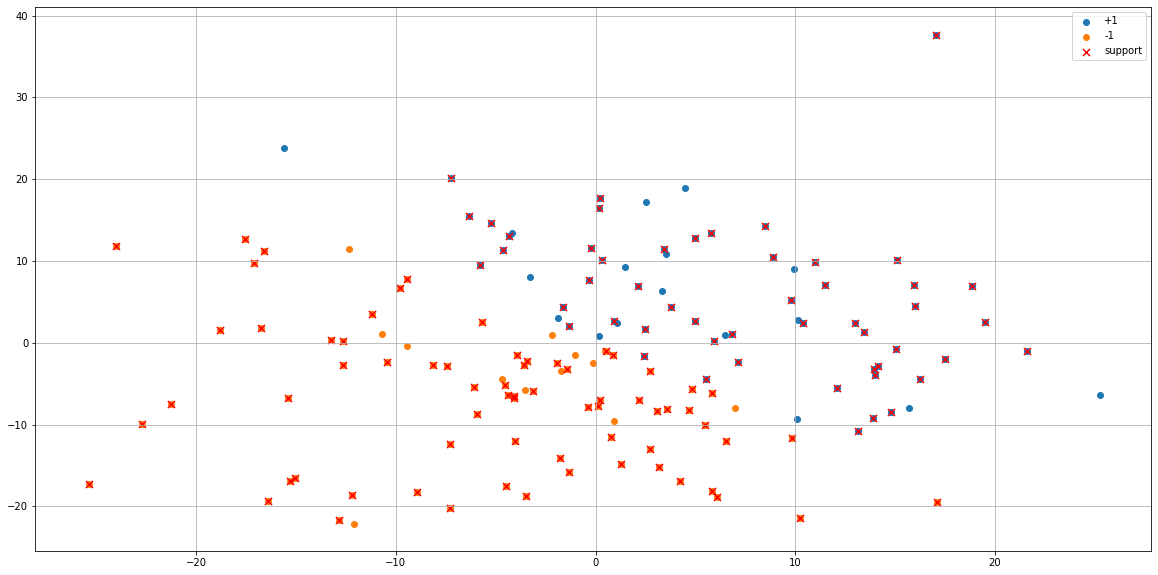

In [6]:

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

X1 = X[Y==1]
X2 = X[Y==-1]
plt.scatter(X1.T[0],X1.T[1], label = '+1')
plt.scatter(X2.T[0],X2.T[1], label = '-1')

support_data = svm.get_support_data()

s1, s2 = support_data['support_vectors'].T

plt.scatter(s1,s2, marker = 'x', color = 'r', label = 'support', s=50)
#plt.scatter(new_point[0][0],new_point[0][1], label = 'new_point : '+ str(sign))

plt.grid()
plt.legend()
plt.show()


In [8]:
X_plus = np.random.normal(0,10,(100,2))
X_minus = np.random.normal(40,10,(100,2))

Y_plus = np.ones(100)
Y_minus = -np.ones(100)

X = np.concatenate([X_plus, X_minus])
Y = np.concatenate([Y_plus, Y_minus])

idx = np.arange(0,len(X))
np.random.shuffle(idx)
X = X[idx]
Y = Y[idx]


N,p = X.shape
split = int(0.8*N)
X_train, X_val = X[:split], X[split:]
y_train, y_val = Y[:split], Y[split:]




kernel = kl.SquareExponential(0.9,0.8)
svm = ML.SVM(kernel = kernel, C = 1)
svm.fit(X_train,y_train)
training_acc = sum(svm.predict(X_train) == y_train.reshape(-1,1))/len(y_train)

print(training_acc)


validation_acc = sum(svm.predict(X_val) == y_val.reshape(-1,1))/len(y_val)

print(validation_acc)

[1.]
[0.75]


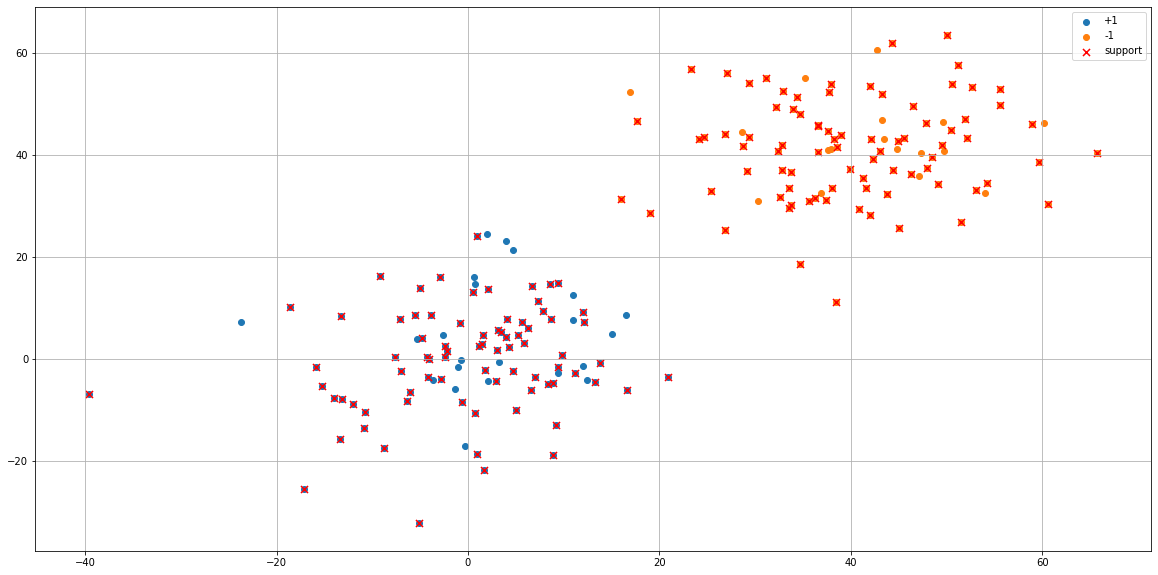

In [9]:

import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))

X1 = X[Y==1]
X2 = X[Y==-1]
plt.scatter(X1.T[0],X1.T[1], label = '+1')
plt.scatter(X2.T[0],X2.T[1], label = '-1')

support_data = svm.get_support_data()

s1, s2 = support_data['support_vectors'].T

plt.scatter(s1,s2, marker = 'x', color = 'r', label = 'support', s=50)
#plt.scatter(new_point[0][0],new_point[0][1], label = 'new_point : '+ str(sign))

plt.grid()
plt.legend()
plt.show()